In [1]:
import pysal as ps 
import pandas as pd 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal.lib
import pysal.explore
import pysal.viz
import pysal.model
#from pysal.lib import weights, examples
#from pysal.lib.weights.weights import W
#from pysal.lib.weights.contiguity import Queen
#from pysal.lib import examples



C:\Users\jwolf\AppData\Local\conda\conda\envs\pandas\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [5]:
ps.lib.examples.available()
ps.lib.examples.explain('mexico')
    
# ps.lib.weights

{'name': 'mexico',
 'description': 'Decennial per capita incomes of Mexican states 1940-2000',
 'explanation': ['* mexico.csv: attribute data. (n=32, k=13)',
  '* mexico.gal: spatial weights in GAL format.',
  '* mexicojoin.shp: Polygon shapefile. (n=32)',
  'Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.']}

In [2]:
path = "C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Administrativos/Freguesias/Freguesia_CAOP_2010.shp"
gdf = gpd.read_file (path)
#freguesias_shp = ps.open(path + '.shp')
#freguesias_dbf = ps.open(path + '.dbf')
#freguesias_dbf.header

In [3]:
w3= pysal.lib.weights.KNN.from_shapefile(path, k= 3)
w5= pysal.lib.weights.KNN.from_shapefile(path, k= 5)
w7= pysal.lib.weights.KNN.from_shapefile(path, k= 7)

In [4]:
w_distancia_20 = pysal.lib.weights.DistanceBand.from_shapefile(path, p = 2, alpha=-2, threshold= 15000)


In [9]:
y = gdf['Var01_11']
y2 = gdf['Var91_01']

#w_distancia_20.islands
moran_dist_20 = pysal.explore.esda.Moran_Local(y, w_distancia_20, transformation='r', permutations=999)
moran_dist_20_Var91_01 = pysal.explore.esda.Moran_Local(y2, w_distancia_20, transformation='r', permutations=999)

In [10]:
y = gdf['Var01_11']
y2 = gdf['Var01_11']
moran_3 = pysal.explore.esda.Moran_Local(y, w3, transformation='r', permutations=999)
moran_5 = pysal.explore.esda.Moran_Local(y, w5, transformation='r', permutations=999)
moran_5_Var91_01 = pysal.explore.esda.Moran_Local(y2, w5, transformation='r', permutations=999)
moran_7 = pysal.explore.esda.Moran_Local(y, w7, transformation='r', permutations=999)


In [11]:
gdf_n = gdf.merge(pd.DataFrame(moran_3.q), left_index=True, right_index=True)
#pd.DataFrame(moran_3.q)
#df_n = gdf.merge(gdf, df_f,  how='left', left_on=['code','ano'], right_on = ['code','ano'])

In [12]:
g#df_n.loc[:, 0]


NameError: name 'g' is not defined

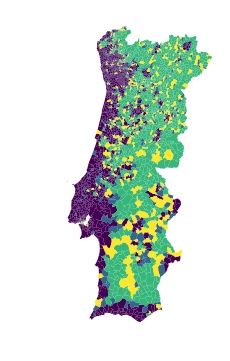

In [13]:
#If False use PySAL Scheme: HH=1, LH=2, LL=3, HL=4
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
gdf_n.plot(ax = ax , linewidth=0, column = 0)
#gdf_n.plot()


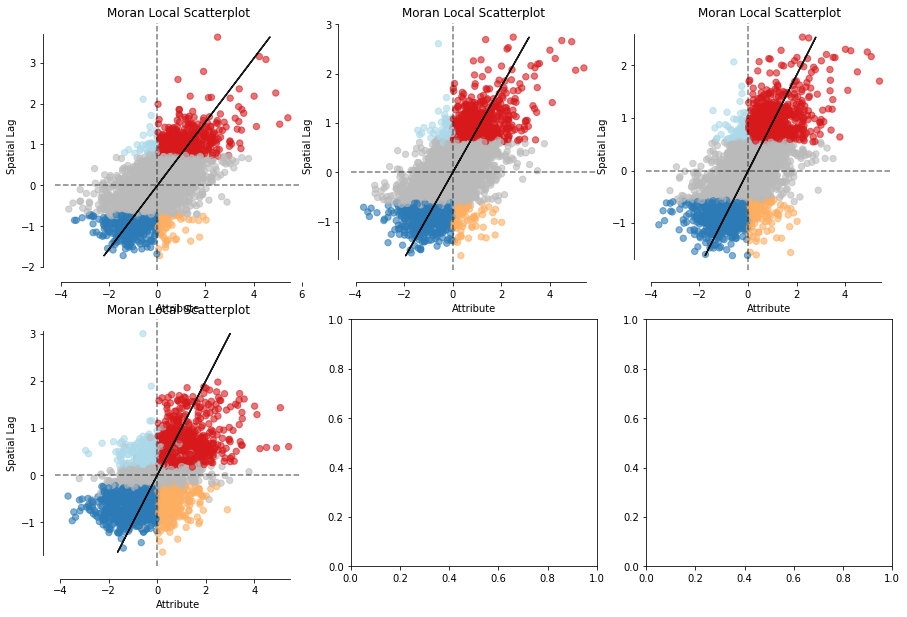

In [14]:
from pysal.viz.splot.esda import moran_scatterplot
fig, axs = plt.subplots(2, 3, figsize = (15,10))
moran_scatterplot(moran_3, p=0.05, ax = axs[0,0])
moran_scatterplot(moran_5, p=0.05, ax = axs[0,1])
moran_scatterplot(moran_7, p=0.05, ax = axs[0,2])
moran_scatterplot(moran_dist_20, p=0.05, ax = axs[1,0])
plt.show()

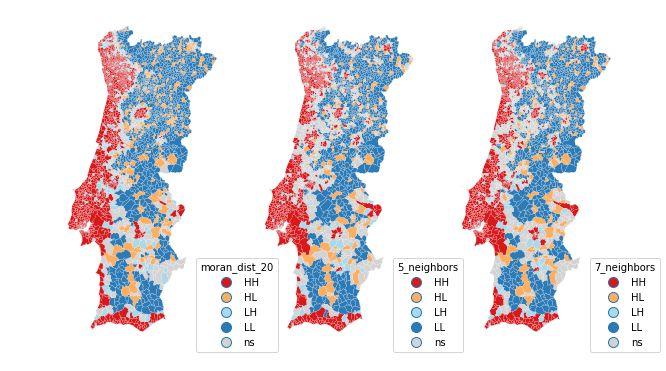

In [15]:
from pysal.viz.splot.esda import lisa_cluster
from pysal.viz.splot.esda import plot_local_autocorrelation
gdf1 = gdf.copy()
fig, axs = plt.subplots(1, 3, figsize = (10,10))

cartogramas = [(moran_dist_20, 'moran_dist_20'),(moran_5, '5_neighbors'),(moran_7, '7_neighbors')]
i=0 
for x in cartogramas:
    legenda = {'loc': 'upper left', 'bbox_to_anchor': (0.8, 0.28), 'title': x[1]}
    lisa_cluster(x[0], gdf1, p=0.3, ax = axs[i], legend_kwds= legenda)
    i += 1
plt.show()

In [17]:
cartogramas

[(<pysal.explore.esda.moran.Moran_Local at 0x27fd0b8c7f0>, 'moran_dist_20'),
 (<pysal.explore.esda.moran.Moran_Local at 0x27fce687710>, '5_neighbors'),
 (<pysal.explore.esda.moran.Moran_Local at 0x27fce807048>, '7_neighbors')]

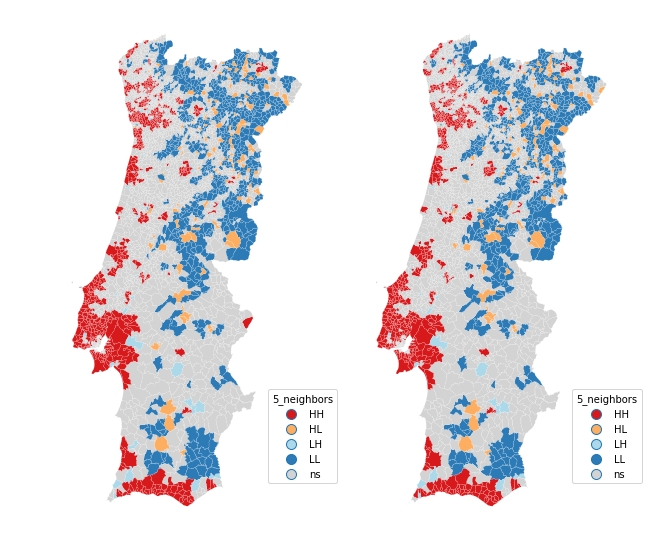

In [18]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))
gdf2 = gdf.copy()
cartogramas = [(moran_5_Var91_01, '5_neighbors'),(moran_5, '5_neighbors')]
i=0 
for x in cartogramas:
    legenda = {'loc': 'upper left', 'bbox_to_anchor': (0.8, 0.28), 'title': x[1]}
    lisa_cluster(x[0], gdf2, p=0.1, ax = axs[i], legend_kwds= legenda)
    i += 1


# plt.show()
#plt.savefig('MORAN.png')

In [ ]:
from pysal.viz.splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_3, gdf, 'Var01_11')
plt.show()